# Share of education in government expenditure

## Plan of Action

- Explore the data 
- Add in any missing values from other data sources
- Clean the data
- Get the mean rate of education in government expenditure over a given time period (2000-2021)

## Data source

- The raw data source is avaliable in a csv file titled '4.unclean-share-of-education-in-government-expenditure.csv'
- This data source (https://ourworldindata.org/grapher/share-of-education-in-government-expenditure) was derived from the World Bank government spending across the world
- The original datasets spans a time period from 1980 to 2021
- The world bank describes the data as "General government expenditure on education (current, capital, and transfers) is expressed as a percentage of total general government expenditure on all sectors (including health, education, social services, etc.)" https://ourworldindata.org/government-spending
- They also add "General government usually refers to local, regional and central governments."

## Data Preprocessing

### Importing and viewing the data

In [1]:
import pandas as pd

In [2]:
df2 = pd.read_csv("4.unclean-share-of-education-in-government-expenditure.csv")
df2

,Entity,Code,Year,"Government expenditure on education, total (% of government expenditure)"
0,Afghanistan,AFG,2010,17.067560
1,Afghanistan,AFG,2011,16.048429
2,Afghanistan,AFG,2013,14.102800
3,Afghanistan,AFG,2014,14.465930
4,Afghanistan,AFG,2015,12.509000
...,...,...,...,...
3529,Zimbabwe,ZWE,2014,30.015150
3530,Zimbabwe,ZWE,2015,29.470831
3531,Zimbabwe,ZWE,2016,23.527081
3532,Zimbabwe,ZWE,2017,20.874201


### Exploring the dataset 
Let's see what this dataset looks like 

In [3]:
df2.shape

(3534, 4)

This dataframe has 3534 rows and 4 columns

In [4]:
print(("The earliest year in this dataset is"), df2['Year'].min())
print(("The latest year in this dataset is"), df2['Year'].max())

The earliest year in this dataset is 1980
The latest year in this dataset is 2021


In [5]:
df2.dtypes

Entity                                                                       object
Code                                                                         object
Year                                                                          int64
Government expenditure on education, total (% of government expenditure)    float64
dtype: object

The 'Entity' and 'Code' columns are strings, the 'Year' column is an integer and the goverment expenditure column is a float 

In [6]:
df2.columns

Index(['Entity', 'Code', 'Year',
       'Government expenditure on education, total (% of government expenditure)'],
      dtype='object')

The 'Entity' column refers to the country the data is referring to. The 'code' refers to the country code. The government expenditure column refers to general government expenditure on education (current, capital, and transfers) as expressed as a percentage of total general government. The 'Year' refers to the corresponding year that the data was taken

In [7]:
df2['Entity'].nunique()

206

There are 206 countries represented in this data 

### Renaming columns 
- All other names are rather simple, except for the government expenditure one, which may cause unnecessary problems when dealing with this column. So let's rename this column 
- The 'Entity' columnn refers to  countries, so let's rename this column as well  

In [8]:
df2.rename(columns={'Government expenditure on education, total (% of government expenditure)': 'Gvt_Exp_on_Education'}, inplace=True)
df2.rename(columns = {'Entity': 'Country'}, inplace=True)

Let's check the column names now

In [9]:
df2.columns

Index(['Country', 'Code', 'Year', 'Gvt_Exp_on_Education'], dtype='object')

Let's create a copy of the filtered table in case we want to go back to the original

In [10]:
filtered_df = df2.copy()

Since we have already identified the countries with the 5 highest and lowest highest literacy rates, we can filter those countries 

In [11]:
countries = ['Korea', 'Latvia', 'Estonia', 'Lithuania', 'Cuba', 'Chad', 'Afghanistan', 'Mali', 'Niger', 'Guinea']
filtered_df = df2[df2["Country"].isin(countries)]
filtered_df = filtered_df.reset_index(drop=True)
filtered_df

,Country,Code,Year,Gvt_Exp_on_Education
0,Afghanistan,AFG,2010,17.067560
1,Afghanistan,AFG,2011,16.048429
2,Afghanistan,AFG,2013,14.102800
3,Afghanistan,AFG,2014,14.465930
4,Afghanistan,AFG,2015,12.509000
...,...,...,...,...
157,Niger,NER,2017,13.215160
158,Niger,NER,2018,16.339970
159,Niger,NER,2019,13.012810
160,Niger,NER,2020,13.332540


Let's check to see if our data has all of the countries that we are looking for

In [12]:
filtered_df['Country'].nunique()

8

In [13]:
unique_countries = filtered_df['Country'].unique()
print("Unique countries:", unique_countries)

Unique countries: ['Afghanistan' 'Chad' 'Estonia' 'Guinea' 'Latvia' 'Lithuania' 'Mali'
 'Niger']


We can see that Cuba and Korea are missing from the dataset, so we'll have to add those in

## Additional dataset

We found another dataset (https://data.worldbank.org/indicator/SE.XPD.TOTL.GD.ZS?end=2020&start=1980&view=chart) which had some more values from different region and countries.

Let's check this dataset to see if we can find some data for Cuba and Korea

In [14]:
df3 = pd.read_csv("4.unclean-education-govt-exp-incl-cuba.csv")
df3

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Aruba,ABW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,21.877630,19.617979,23.201380,21.853750,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,17.243259,18.097099,16.962910,17.198811,17.150761,17.306705,15.35272,14.564090,13.65829,NaN
2,Afghanistan,AFG,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,14.102800,14.465930,12.509000,13.091000,12.033200,11.696060,11.34377,10.253860,10.88011,NaN
3,Africa Western and Central,AFW,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,14.963605,12.939880,13.121995,12.854880,16.058439,16.114195,14.15939,14.339985,14.93463,13.813610
4,Angola,AGO,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,8.826970,6.162840,8.918780,6.550970,6.763780,5.410230,6.04536,6.467230,6.91961,6.640472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,South Africa,ZAF,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,18.696600,18.989161,18.699350,18.048740,18.719290,18.901590,19.59623,19.527281,18.41724,19.750040
264,Zambia,ZMB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,15.400000,20.100000,16.335600,15.663620,14.934340,17.118719,15.29187,12.378020,11.51414,10.447814


Let's explore this dataset

In [15]:
df3.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

The earliest year is 1960 in this dataset and the latest year is 2022

In [16]:
df3['Country Name'].unique()

array(['Aruba', 'Africa Eastern and Southern', 'Afghanistan',
       'Africa Western and Central', 'Angola', 'Albania', 'Andorra',
       'Arab World', 'United Arab Emirates', 'Argentina', 'Armenia',
       'American Samoa', 'Antigua and Barbuda', 'Australia', 'Austria',
       'Azerbaijan', 'Burundi', 'Belgium', 'Benin', 'Burkina Faso',
       'Bangladesh', 'Bulgaria', 'Bahrain', 'Bahamas, The',
       'Bosnia and Herzegovina', 'Belarus', 'Belize', 'Bermuda',
       'Bolivia', 'Brazil', 'Barbados', 'Brunei Darussalam', 'Bhutan',
       'Botswana', 'Central African Republic', 'Canada',
       'Central Europe and the Baltics', 'Switzerland', 'Channel Islands',
       'Chile', 'China', "Cote d'Ivoire", 'Cameroon', 'Congo, Dem. Rep.',
       'Congo, Rep.', 'Colombia', 'Comoros', 'Cabo Verde', 'Costa Rica',
       'Caribbean small states', 'Cuba', 'Curacao', 'Cayman Islands',
       'Cyprus', 'Czechia', 'Germany', 'Djibouti', 'Dominica', 'Denmark',
       'Dominican Republic', 'Algeria',
 

This dataset also has regional figures for government expenditure on education alongside its country data. This will be useful if we can not find any figures for our top 5 and our bottom 5

### Searching for data for Cuba and Korea

In [17]:
korea_data = df3[df3['Country Name'].str.contains('Korea')]
korea_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
126,"Korea, Rep.",KOR,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,14.65296,14.30254,14.29845,14.31293,13.83082,NaN,NaN,NaN
193,"Korea, Dem. People's Rep.",PRK,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We are interested in Korea, Dem. People's Rep. and there is no data for Korea in this dataset so we will use the regional figures in its place

In [18]:
df3[df3['Country Name'].str.contains('East Asia')]

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
61,East Asia & Pacific (excluding high income),EAP,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.301397,16.045906,15.317964,15.115435,14.256830,16.325880,15.521901,14.407170,15.276836,NaN
63,East Asia & Pacific,EAS,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.422539,16.155823,15.317964,15.115435,14.695935,16.086915,13.930195,14.418585,14.754606,NaN
230,East Asia & Pacific (IDA & IBRD countries),TEA,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.301397,16.045906,15.317964,15.115435,14.256830,16.325880,15.521901,14.407170,15.276836,NaN


We will go for the 'East Asia & Pacific' since we don't want to exclude high income

In [19]:
korean_data = df3[df3['Country Name'] == 'East Asia & Pacific']
korean_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
63,East Asia & Pacific,EAS,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.422539,16.155823,15.317964,15.115435,14.695935,16.086915,13.930195,14.418585,14.754606,NaN


Let's check for our Cuban data

In [20]:
cuba_data = df3[df3['Country Name'] == 'Cuba']
cuba_data

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
50,Cuba,CUB,"Government expenditure on education, total (% ...",SE.XPD.TOTL.GB.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,16.519653,15.801738,15.263568,14.937566,13.564914,12.659974,14.225944,16.6611,NaN,NaN


## Let's add both our Cuban and Korean figures to our filtered_df dataframe

In [21]:
cuba_data = cuba_data.copy()

In [22]:
cuba_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

### Cleaning the Cuban data 

First we will drop the columns that do not suit our given range

In [23]:
cuba_data.drop(cuba_data.columns[cuba_data.columns < '2000'], axis=1, inplace=True)

Let's check the columns with the years before 2000 have been dropped correctly

In [24]:
cuba_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

We need to melt the columns to mirror the format of our filtered_df dataframe

In [25]:
# # Rename the columns
cuba_data = cuba_data.rename(columns={'Country Name': 'Country', 'Country Code': 'Code', 'Indicator Name': 'Indicator', 'Indicator Code': 'Indicator Code'})

# Perform melt
cuba_data = cuba_data.melt(id_vars=['Country', 'Code'], value_vars = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017','2018', '2019', '2020', '2021', '2022'], 
                                                                      var_name='Year', value_name='Gvt_Exp_on_Education')

In [26]:
cuba_data

,Country,Code,Year,Gvt_Exp_on_Education
0,Cuba,CUB,2000,NaN
1,Cuba,CUB,2001,NaN
2,Cuba,CUB,2002,NaN
3,Cuba,CUB,2003,NaN
4,Cuba,CUB,2004,NaN
5,Cuba,CUB,2005,NaN
6,Cuba,CUB,2006,NaN
7,Cuba,CUB,2007,NaN
8,Cuba,CUB,2008,NaN
9,Cuba,CUB,2009,NaN


### Cleaning the Korea data 
Following the same steps that we did for the Cuban dataset

In [27]:
korean_data = korean_data.copy()

In [28]:
korean_data.drop(korean_data.columns[korean_data.columns < '2000'], axis=1, inplace=True)

In [29]:
korean_data.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017',
       '2018', '2019', '2020', '2021', '2022'],
      dtype='object')

In [30]:
# # Rename the columns
korean_data = korean_data.rename(columns={'Country Name': 'Country', 'Country Code': 'Code', 'Indicator Name': 'Indicator', 'Indicator Code': 'Indicator Code'})

# Perform melt operation
korean_data = korean_data.melt(id_vars=['Country', 'Code'], value_vars = ['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017','2018', '2019', '2020', '2021', '2022'], 
                                                                      var_name='Year', value_name='Gvt_Exp_on_Education')

In [31]:
korean_data

,Country,Code,Year,Gvt_Exp_on_Education
0,East Asia & Pacific,EAS,2000,NaN
1,East Asia & Pacific,EAS,2001,NaN
2,East Asia & Pacific,EAS,2002,16.497231
3,East Asia & Pacific,EAS,2003,NaN
4,East Asia & Pacific,EAS,2004,16.439480
5,East Asia & Pacific,EAS,2005,NaN
6,East Asia & Pacific,EAS,2006,NaN
7,East Asia & Pacific,EAS,2007,14.964565
8,East Asia & Pacific,EAS,2008,14.188845
9,East Asia & Pacific,EAS,2009,14.511420


Now we need to add these figures onto our filtered_df dataframe using .concat()

In [32]:
# Concatenate the two DataFrames
combined_df = pd.concat([filtered_df, cuba_data, korean_data])

#Reset the index of the combined DataFrame
combined_df = combined_df.reset_index(drop=True)

combined_df

,Country,Code,Year,Gvt_Exp_on_Education
0,Afghanistan,AFG,2010,17.067560
1,Afghanistan,AFG,2011,16.048429
2,Afghanistan,AFG,2013,14.102800
3,Afghanistan,AFG,2014,14.465930
4,Afghanistan,AFG,2015,12.509000
...,...,...,...,...
203,East Asia & Pacific,EAS,2018,16.086915
204,East Asia & Pacific,EAS,2019,13.930195
205,East Asia & Pacific,EAS,2020,14.418585
206,East Asia & Pacific,EAS,2021,14.754606


In [33]:
unique_countries = combined_df['Country'].nunique()
print("Number of unique countries:", unique_countries)

Number of unique countries: 10


We now have all of our ten countries in one dataframe

### Looking at our filtered dataset

Let's change the 'East Asia & Pacific' value to 'Korea, Dem. People's Rep.'

In [34]:
combined_df['Country'] = combined_df['Country'].replace('East Asia & Pacific', "Korea, Dem. People's Rep.")

Let's check the data types of the columns 

In [35]:
combined_df.dtypes

Country                  object
Code                     object
Year                     object
Gvt_Exp_on_Education    float64
dtype: object

Let's change the year column into an integer data type

In [36]:
combined_df['Year'] = combined_df['Year'].astype(int)

By looking at the .min() of the data we can see that the data starts from 1991

In [37]:
print("The minimum year is", combined_df['Year'].min())
print("The maximum year is",combined_df['Year'].max())

The minimum year is 1991
The maximum year is 2022


Since we are only looking at data from 2000 - 2021, we'll need to get rid of any rows from 1997 to 1999 and after 2021

In [38]:
combined_df = combined_df[combined_df['Year'] > 1999]
combined_df = combined_df.loc[combined_df['Year'] <= 2021]
combined_df = combined_df.reset_index(drop=True)

Let's check to see what year the dataset now starts from

In [39]:
print("The minimum year is", combined_df['Year'].min())
print("The maximum year is",combined_df['Year'].max())

The minimum year is 2000
The maximum year is 2021


Not all of the countries in our chosen 10 have the same year range, so we'll have to see what the time span is for each country 

In [40]:
country_year_count = combined_df.groupby('Country')['Year'].count()
country_year_count

Country
Afghanistan                  11
Chad                         16
Cuba                         22
Estonia                      18
Guinea                       20
Korea, Dem. People's Rep.    22
Latvia                       18
Lithuania                    18
Mali                         20
Niger                        20
Name: Year, dtype: int64

The highest amount of years is 21 and the lowest is 11, this is not too much of a range, so we can proceed

## Cleaning the data 

In [41]:
combined_df[['Country', 'Gvt_Exp_on_Education']][combined_df.Gvt_Exp_on_Education.isna()]

,Country,Gvt_Exp_on_Education
141,Cuba,NaN
142,Cuba,NaN
143,Cuba,NaN
144,Cuba,NaN
145,Cuba,NaN
146,Cuba,NaN
147,Cuba,NaN
148,Cuba,NaN
149,Cuba,NaN
150,Cuba,NaN


In [42]:
#removing the rows with null values
combined_df.dropna(inplace=True)

### Finding the mean of each country 

In [43]:
# we are grouping our data by year and then calculate mean Gross Earnings for each year. 
countries_mean = combined_df.groupby('Country')['Gvt_Exp_on_Education'].mean()
countries_mean

Country
Afghanistan                  13.044702
Chad                         11.933025
Cuba                         15.123699
Estonia                      13.668718
Guinea                       12.861944
Korea, Dem. People's Rep.    15.258061
Latvia                       14.311544
Lithuania                    13.705299
Mali                         16.659471
Niger                        16.770930
Name: Gvt_Exp_on_Education, dtype: float64

### Finding the median for each country

In [44]:
countries_median = combined_df.groupby('Country')['Gvt_Exp_on_Education'].median()
countries_median

Country
Afghanistan                  12.509000
Chad                         12.066485
Cuba                         15.263568
Estonia                      13.524495
Guinea                       12.421840
Korea, Dem. People's Rep.    14.964565
Latvia                       14.097230
Lithuania                    13.239080
Mali                         16.519120
Niger                        16.775310
Name: Gvt_Exp_on_Education, dtype: float64

For this dataset, we have decided to go with the mean, since it is not too far off from the median, so there aren't significant outliers in this data

## Visualisations
Let's present these results using visualisations that can help us to interpret the results of our work

First, we'll have to import the necessary modules

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

([], [])

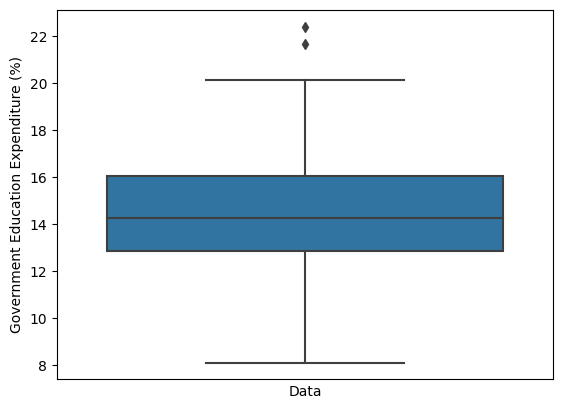

In [46]:
sns.boxplot(combined_df["Gvt_Exp_on_Education"])
plt.xlabel("Data")
plt.ylabel("Government Education Expenditure (%)")
plt.xticks([])

The above graph shows the data dispersal for our whole sample
#### Observations
- The median figure for government education expenditure is around 14% 
- There are a couple of outliers in the data, with high figures for government education expenditure at ~21%
- The spread of data is not that large 
- The data is relatively normally distributed

#### Let's see how the data compares country by country across our given time period

(array([ 6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.]),
 [Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14'),
  Text(0, 16.0, '16'),
  Text(0, 18.0, '18'),
  Text(0, 20.0, '20'),
  Text(0, 22.0, '22'),
  Text(0, 24.0, '24')])

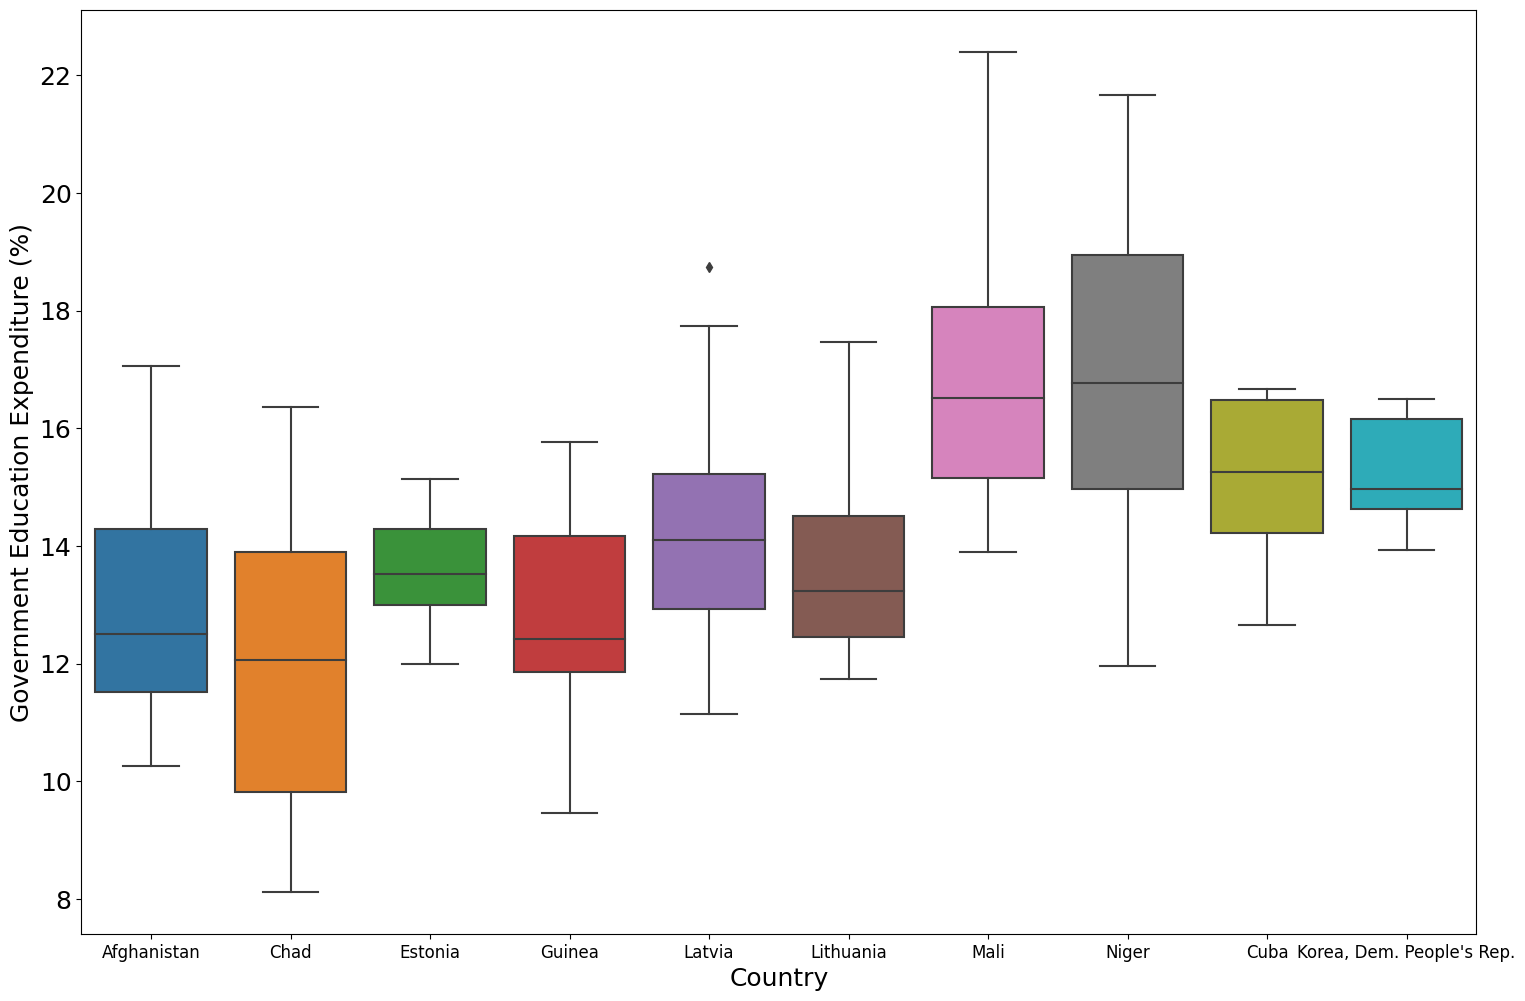

In [47]:
plt.figure(figsize=(18,12))
sns.boxplot(y= combined_df["Gvt_Exp_on_Education"], x=combined_df["Country"])
plt.xlabel("Country", fontsize=18)
plt.ylabel("Government Education Expenditure (%)", fontsize=18)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=18)

#### Observations

From the above graph:
- We can see that Mali and Niger have the largest dispersal of data. In comparison, Korea and Estonia have some of the lowest distribution of data
- The median for all of the countries ranges between 12 and 16.
- Half of the countries (Afghanisation, Estonia, Guinea, Lithuania, Korea) are right- skewed which means that they have a positive skew.
- Half of the countries have a relatively normal distribution (Chad, Latvia, Mali, Cuba and Niger)
- There is only one outlier in this dataset, ignoring everything else, this means that predictions about this data can be fairly certain
- To conclude, there isn't a huge variation in government education expenditure for our sample countries

#### Let's explore how the data compares on a yearly basis

(array([ 6.,  8., 10., 12., 14., 16., 18., 20., 22., 24.]),
 [Text(0, 6.0, '6'),
  Text(0, 8.0, '8'),
  Text(0, 10.0, '10'),
  Text(0, 12.0, '12'),
  Text(0, 14.0, '14'),
  Text(0, 16.0, '16'),
  Text(0, 18.0, '18'),
  Text(0, 20.0, '20'),
  Text(0, 22.0, '22'),
  Text(0, 24.0, '24')])

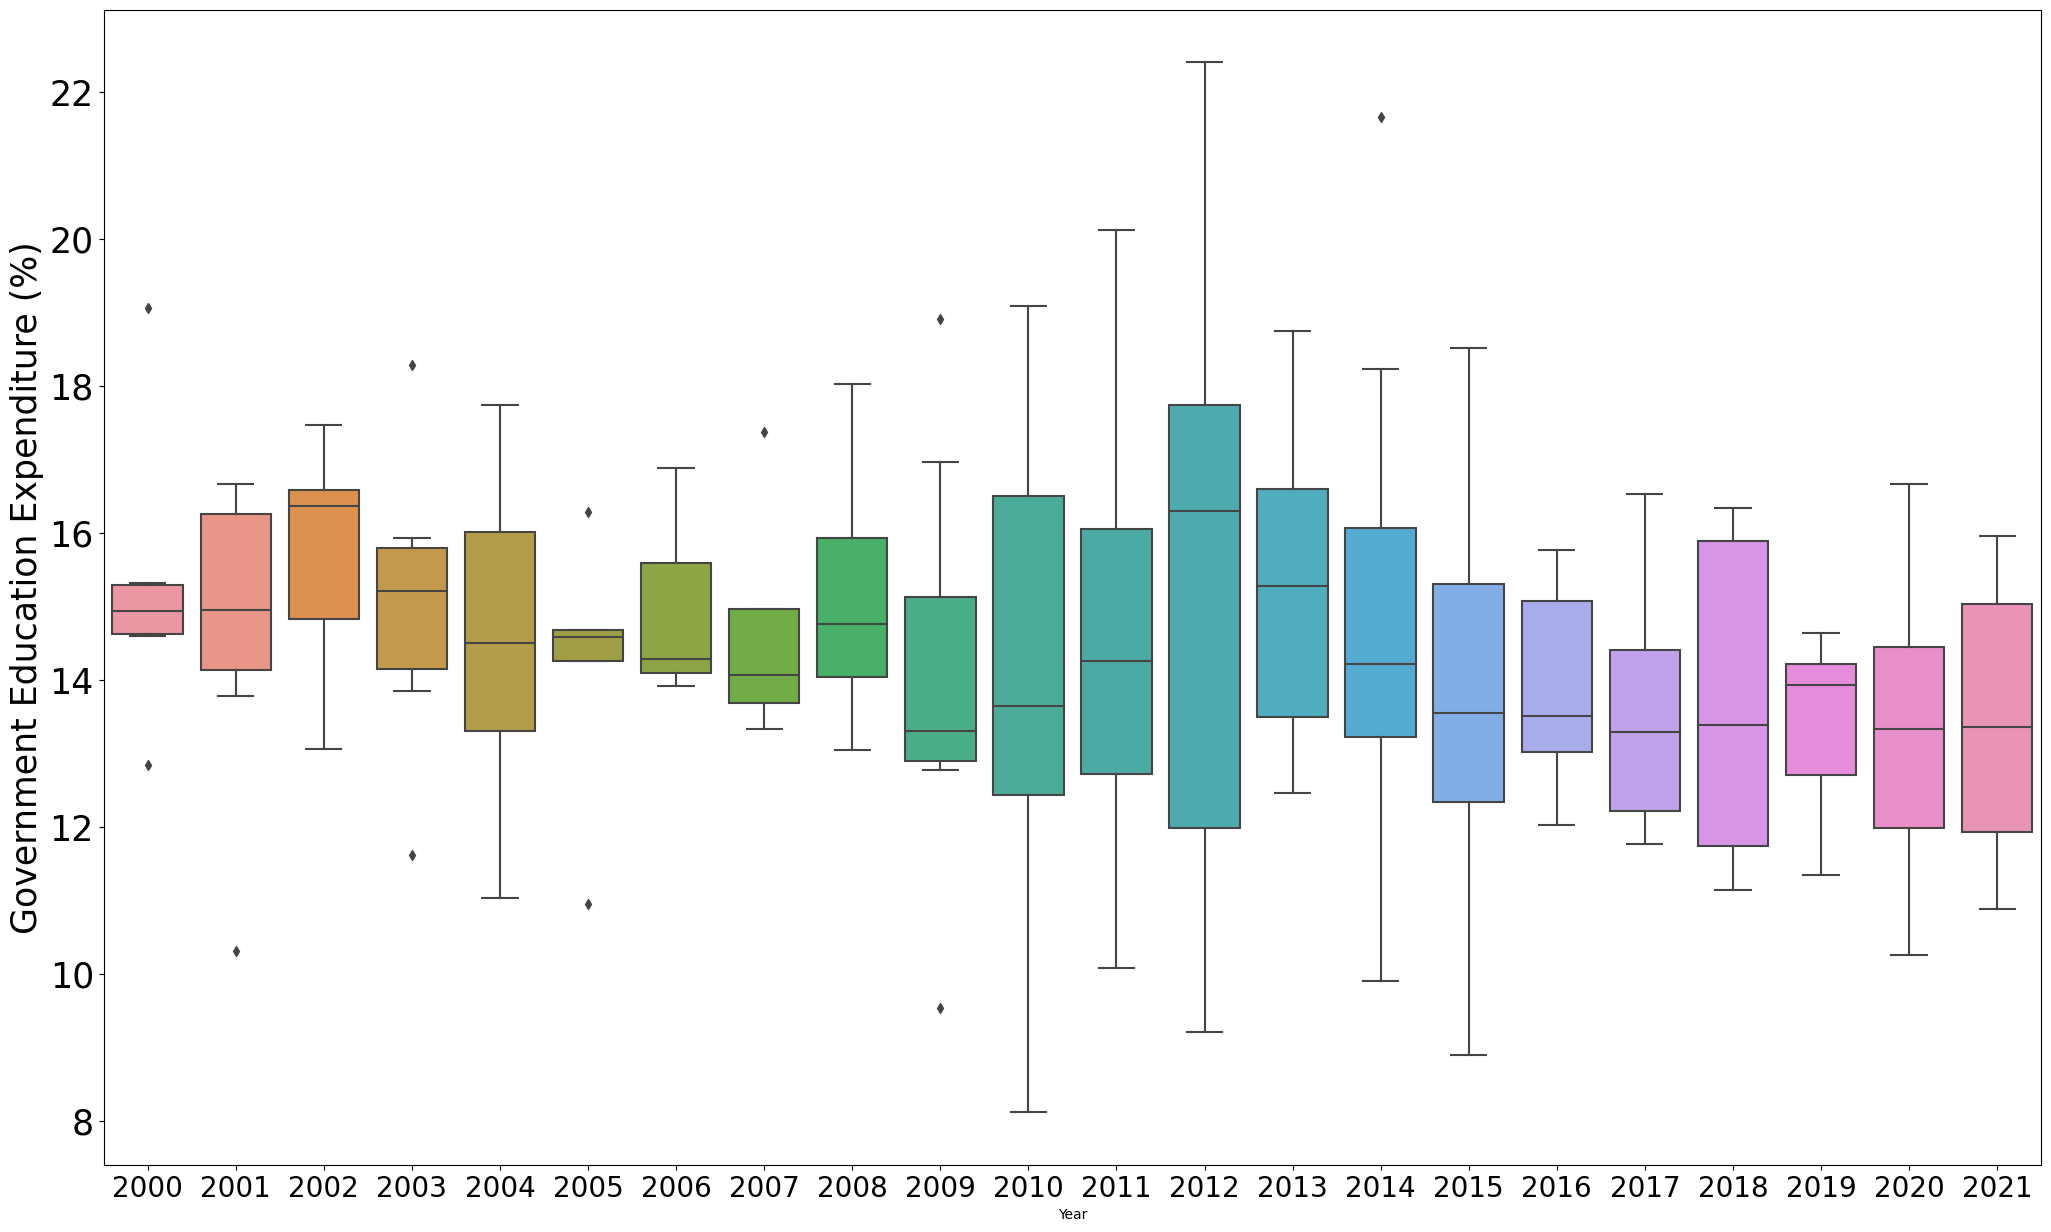

In [48]:
plt.figure(figsize=(25,15))
sns.boxplot(y= combined_df["Gvt_Exp_on_Education"], x=combined_df["Year"])
plt.xlabel("Year")
plt.ylabel("Government Education Expenditure (%)", fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=25)

#### Observations
- The median value ranges widely, however we can see a slight decrease over the time range, however we will confirm this with a scatterplot
- We can see the dispersal of data starts off small then increases (whilst fluctuating widely) until it reaches the largest dispersal in 2012, where we can see the minimum at roughly 9%, the median at 16% and the 22%
- There are more outliers in the beginning of the time range then at the end 
- There are 10 years with right-skewed data, there are 4 years with relatively normal distributions and the rest are left-skewed

#### Let's plot a scatter graph to see if we can get any more insights from our visualisations

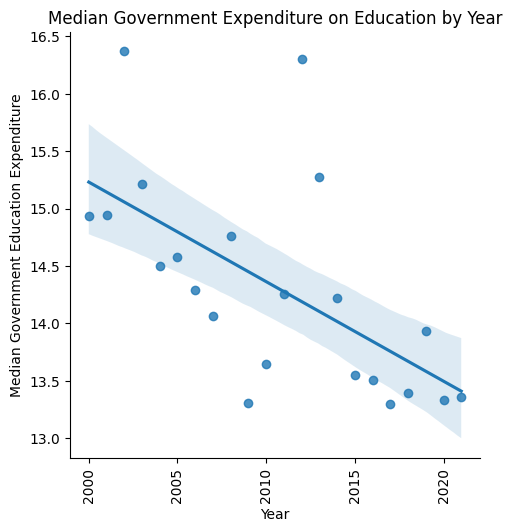

In [49]:
# Finding the yearly median
year_median = combined_df.groupby('Year')['Gvt_Exp_on_Education'].median()
year_median = pd.DataFrame(year_median).reset_index()
year_median = year_median.astype('float64')

# Plot scatter plot with linear regression line
sns.lmplot(x='Year', y='Gvt_Exp_on_Education', data=year_median, hue=None)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Median Government Education Expenditure')
plt.title('Median Government Expenditure on Education by Year')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

- This graph confirms that there is a slight gradual decrease in median over the time range given. 
- There are also a few outliers in the 2003 and between 2010 and 2015

### Mean Values
Since we are taking the mean values over the median values, let's plot some graphs that look at the mean values of the data

First let's explore the mean values by year

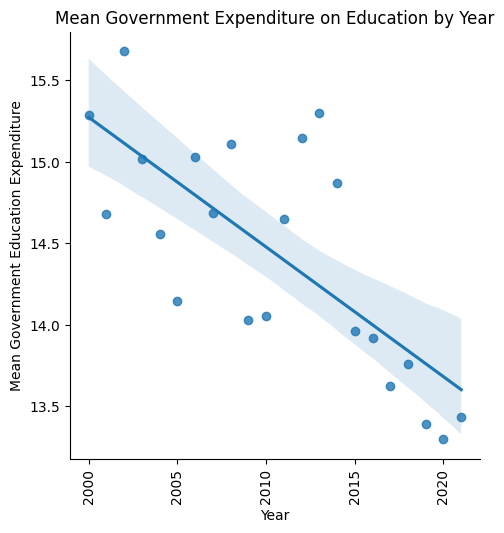

In [50]:
# Finding the yearly median
year_mean = combined_df.groupby('Year')['Gvt_Exp_on_Education'].mean()
year_mean = pd.DataFrame(year_mean).reset_index()
year_mean = year_mean.astype('float64')

# Plot scatter plot with linear regression line
sns.lmplot(x='Year', y='Gvt_Exp_on_Education', data=year_mean, hue=None)

# Set labels and title
plt.xlabel('Year')
plt.ylabel('Mean Government Education Expenditure')
plt.title('Mean Government Expenditure on Education by Year')

# Rotate x-axis labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

Similar to the median graph, we can see that there is a decrease in the mean values over the given period. This means that the average government spending on education decreased over the time shown, but this does not mean overall spending on education decreased because we using figures showing education as a proportion of total government spending rather than actual government spending

#### Looking at mean figures by country

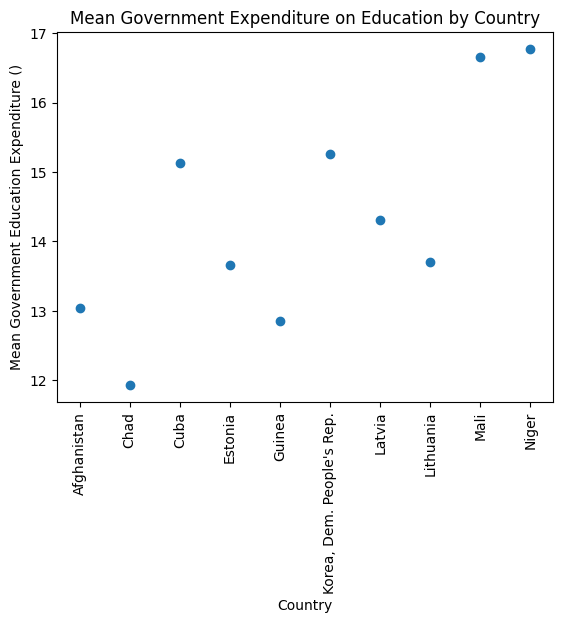

In [51]:
# Group the data by country and year and get all values of 'Gvt_Exp_on_Education'
country_data = combined_df.groupby('Country')['Gvt_Exp_on_Education'].mean()

# Extract the countries and corresponding values
countries = country_data.index
values = country_data.values

# Plot the data
plt.scatter(countries, values)

# Set labels and title
plt.xlabel('Country')
plt.ylabel('Mean Government Education Expenditure ()')
plt.title('Mean Government Expenditure on Education by Country')

# Rotate x-axis tick labels if needed
plt.xticks(rotation=90)

# Display the plot
plt.show()

From the graph we can see that Chad had the lowest average expenditure on education whilst Mali and Niger had the highest

# Add the mean value as another column onto the previous merged table CSV

In [52]:
## Merging our mean government expenditure results to our merged table

# Read the CSV file into a DataFrame
merged_tables_df = pd.read_csv('3.second-merge-fl-cm-il.csv')

merged_tables_df

,Country Name,Country Code,Status,Mean Adult Female Literacy Rate (%),Median Female Child Marriage Rate (%),Income Level
0,Chad,TCD,Lowest,15.379128,24.5560,Low income
1,Afghanistan,AFG,Lowest,19.809310,16.3000,Low income
2,Mali,MLI,Lowest,20.470424,42.1000,Low income
3,Niger,NER,Lowest,20.530956,21.1555,Low income
4,Guinea,GIN,Lowest,22.271088,28.1000,Low income
5,Cuba,CUB,Highest,99.769315,12.3620,Upper middle income
6,Lithuania,LTU,Highest,99.777059,0.1500,High income
7,Estonia,EST,Highest,99.849846,4.8805,High income
8,Latvia,LVA,Highest,99.858515,4.8805,High income
9,"Korea, Dem. People's Rep.",PRK,Highest,99.997612,0.0500,Low income


In [53]:
# Merge the countries_mean with the merged tables DataFrame
merged_tables = merged_tables_df.merge(countries_mean, left_on='Country Name', right_index=True, how='left')

# Save the updated DataFrame as a CSV file
merged_tables.to_csv('4.fourth-merge-fl-cm-il-govtexp.csv', index=False)

merged_tables

,Country Name,Country Code,Status,Mean Adult Female Literacy Rate (%),Median Female Child Marriage Rate (%),Income Level,Gvt_Exp_on_Education
0,Chad,TCD,Lowest,15.379128,24.5560,Low income,11.933025
1,Afghanistan,AFG,Lowest,19.809310,16.3000,Low income,13.044702
2,Mali,MLI,Lowest,20.470424,42.1000,Low income,16.659471
3,Niger,NER,Lowest,20.530956,21.1555,Low income,16.770930
4,Guinea,GIN,Lowest,22.271088,28.1000,Low income,12.861944
5,Cuba,CUB,Highest,99.769315,12.3620,Upper middle income,15.123699
6,Lithuania,LTU,Highest,99.777059,0.1500,High income,13.705299
7,Estonia,EST,Highest,99.849846,4.8805,High income,13.668718
8,Latvia,LVA,Highest,99.858515,4.8805,High income,14.311544
9,"Korea, Dem. People's Rep.",PRK,Highest,99.997612,0.0500,Low income,15.258061


In [54]:
# Rename the column
merged_tables = merged_tables.rename(columns={'Gvt_Exp_on_Education': "Mean Government Education Expenditure Rate (%)"})

In [55]:
merged_tables

,Country Name,Country Code,Status,Mean Adult Female Literacy Rate (%),Median Female Child Marriage Rate (%),Income Level,Mean Government Education Expenditure Rate (%)
0,Chad,TCD,Lowest,15.379128,24.5560,Low income,11.933025
1,Afghanistan,AFG,Lowest,19.809310,16.3000,Low income,13.044702
2,Mali,MLI,Lowest,20.470424,42.1000,Low income,16.659471
3,Niger,NER,Lowest,20.530956,21.1555,Low income,16.770930
4,Guinea,GIN,Lowest,22.271088,28.1000,Low income,12.861944
5,Cuba,CUB,Highest,99.769315,12.3620,Upper middle income,15.123699
6,Lithuania,LTU,Highest,99.777059,0.1500,High income,13.705299
7,Estonia,EST,Highest,99.849846,4.8805,High income,13.668718
8,Latvia,LVA,Highest,99.858515,4.8805,High income,14.311544
9,"Korea, Dem. People's Rep.",PRK,Highest,99.997612,0.0500,Low income,15.258061


In [56]:
# Save the updated DataFrame back to fourth merge CSV file
merged_tables.to_csv('4.fourth-merge-fl-cm-il-govtexp.csv', index=False)